# Modélisation 

Le projet choisit est un sujet de type de la santé en rapport avec la crise sanitaire COVID 19 . Il s'agit d'un apprentissage de type suppervisé d'une problématique de classification de patients présentant de symptomes simmilaires au COVID 19. Le but est d'indentifer les patients atteints du COVID 19. 
## Sommaire

### I.	Gathering data 

1. Open data Health 

2. Problématique et identification de données 


### II. ANALYSE EXPLORATOIRE DES DONNEES
1.	Echantillonnage

2.	Features engineering 

3.	Visualisation des données

### III.	PREPARATION DES DONNEES 

1.	Répartition de données en features X et Target Y

    1.1 Features 
    
    1.2 Target 
    
    
2.	Selection des variables

### IV.	MODELISATION 

1. Description du process de modélisation
2.	Hyperparameters tuning

3.	Evaluation 

### V.	CONCLUSION

In [2]:
%sh
#pip install matplotlib
#pip install numpy
#pip install pandas==0.25.1
###conda install -c anaconda basemap
pip install scikit-learn
pip install spark_df_profiling
pip install pydotplus

pip install missingno
pip install graphviz
pip install xgboost 
pip install imblearn

pip install --upgrade scikit-learn

Requirement already satisfied: scikit-learn in /databricks/python3/lib/python3.7/site-packages (0.23.2)
Requirement already satisfied: threadpoolctl>=2.0.0 in /databricks/python3/lib/python3.7/site-packages (from scikit-learn) (2.1.0)
Requirement already satisfied: scipy>=0.19.1 in /databricks/python3/lib/python3.7/site-packages (from scikit-learn) (1.2.1)
Requirement already satisfied: numpy>=1.13.3 in /databricks/python3/lib/python3.7/site-packages (from scikit-learn) (1.16.2)
Requirement already satisfied: joblib>=0.11 in /databricks/python3/lib/python3.7/site-packages (from scikit-learn) (0.17.0)
You are using pip version 19.0.3, however version 20.2.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Requirement already satisfied: spark_df_profiling in /databricks/python3/lib/python3.7/site-packages (1.1.13)
Requirement already satisfied: pandas>=0.17.0 in /databricks/python3/lib/python3.7/site-packages (from spark_df_profiling) (0.24.2)
Requirement already satisfied: six>=1.9.0 in /databricks/python3/lib/python3.7/site-packages (from spark_df_profiling) (1.12.0)
Requirement already satisfied: jinja2>=2.8 in /databricks/python3/lib/python3.7/site-packages (from spark_df_profiling) (2.11.2)
Requirement already satisfied: matplotlib>=1.4 in /databricks/python3/lib/python3.7/site-packages (from spark_df_profiling) (3.0.3)
Requirement already satisfied: numpy>=1.12.0 in /databricks/python3/lib/python3.7/site-packages (from pandas>=0.17.0->spark_df_profiling) (1.16.2)
Requirement already satisfied: python-dateutil>=2.5.0 in /databricks/python3/lib/python3.7/site-packages (from pandas>=0.17.0->spark_df_profiling) (2.8.0)
Requirement already satisfied: pytz>=2011k in /databricks/python3/lib/python3.7/site-packages (from pandas>=0.17.0->spark_df_profiling) (2018.9)
Requirement already satisfied: MarkupSafe>=0.23 in /databricks/python3/lib/python3.7/site-packages (from jinja2>=2.8->spark_df_profiling) (1.1.1)
Requirement already satisfied: kiwisolver>=1.0.1 in /databricks/python3/lib/python3.7/site-packages (from matplotlib>=1.4->spark_df_profiling) (1.2.0)
Requirement already satisfied: cycler>=0.10 in /databricks/python3/lib/python3.7/site-packages (from matplotlib>=1.4->spark_df_profiling) (0.10.0)
Requirement already satisfied: pyparsing!=2.0.4,!=2.1.2,!=2.1.6,>=2.0.1 in /databricks/python3/lib/python3.7/site-packages (from matplotlib>=1.4->spark_df_profiling) (2.4.7)
You are using pip version 19.0.3, however version 20.2.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Requirement already satisfied: pydotplus in /databricks/python3/lib/python3.7/site-packages (2.0.2)
Requirement already satisfied: pyparsing>=2.0.1 in /databricks/python3/lib/python3.7/site-packages (from pydotplus) (2.4.7)
You are using pip version 19.0.3, however version 20.2.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Requirement already satisfied: missingno in /databricks/python3/lib/python3.7/site-packages (0.4.2)
Requirement already satisfied: matplotlib in /databricks/python3/lib/python3.7/site-packages (from missingno) (3.0.3)
Requirement already satisfied: scipy in /databricks/python3/lib/python3.7/site-packages (from missingno) (1.2.1)
Requirement already satisfied: numpy in /databricks/python3/lib/python3.7/site-packages (from missingno) (1.16.2)
Requirement already satisfied: seaborn in /databricks/python3/lib/python3.7/site-packages (from missingno) (0.9.0)
Requirement already satisfied: python-dateutil>=2.1 in /databricks/python3/lib/python3.7/site-packages (from matplotlib->missingno) (2.8.0)
Requirement already satisfied: kiwisolver>=1.0.1 in /databricks/python3/lib/python3.7/site-packages (from matplotlib->missingno) (1.2.0)
Requirement already satisfied: cycler>=0.10 in /databricks/python3/lib/python3.7/site-packages (from matplotlib->missingno) (0.10.0)
Requirement already satisfied: pyparsing!=2.0.4,!=2.1.2,!=2.1.6,

### Importation de librairies

In [4]:
# Import libraries

from sklearn import tree
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression,BayesianRidge,Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from statsmodels.api import OLS
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import numpy as np
import pandas as pd
import pydotplus
from re import sub
import scipy.stats as sci
import seaborn as sns
import spark_df_profiling
from pathlib import Path


import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import SVG
from graphviz import Source
import itertools
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
 
# Set visualization prefrences 
sns.set(font_scale=1.5, style="darkgrid")
pd.set_option('display.max_columns', None)

## 1. Gathering data

### Importation de données 


%md 

### Open data Health 

- Competition :  Diagnosis of COVID -19 and its clinician spectrum 

https://www.kaggle.com/einsteindata4u/covid19

In [7]:


## Importer les données 
# File location and type
file_location_covid_einstein = "dbfs:/FileStore/tables/covid_einstein.csv"
file_type = "csv"

# CSV options
infer_schema = "true"
first_row_is_header = "true"
delimiter = ","

## import all_vars_for_zeroinf_analysis  file 
# The applied options are for CSV files. For other file types, these will be ignored.
Covid_einstein = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location_covid_einstein)



### Problématique et identification de données

-  L'identifier les données de santé permettant de caractériser les patients présentant préliminaires. 
- 	L’implémentation de ces algorithmes de machine Learning capables d’apprendre à partir de données et de déterminer la probabilité du personne soit atteinte ou pas du COVID 19 à partir de ses symptômes et d'autres caractéristiques.

### II. ANALYSE EXPLORATOIRE DES DONNEES

### Echantillonnage

In [11]:

pandas_Covid_einstein = Covid_einstein.toPandas()

In [12]:
pandas_Covid_einstein.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,NaN,None,None,None,None,None,NaN,None,None,None,None,None,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,not_detected,not_detected,not_detected,not_detected,not_detected,detected,None,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,negative,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,NaN,None,None,None,None,None,NaN,None,None,None,None,None,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,NaN,None,None,None,None,Non

In [13]:
### Taille et nomre de colonnes

pandas_Covid_einstein.shape

Out[23]: (5644, 111)

In [14]:
pandas_Covid_einstein.isnull().sum()

Out[24]: Patient ID 0
Patient age quantile 0
SARS-Cov-2 exam result 0
Patient addmited to regular ward (1=yes, 0=no) 0
Patient addmited to semi-intensive unit (1=yes, 0=no) 0
Patient addmited to intensive care unit (1=yes, 0=no) 0
Hematocrit 5041
Hemoglobin 5041
Platelets 5042
Mean platelet volume 5045
Red blood Cells 5042
Lymphocytes 5042
Mean corpuscular hemoglobin concentration (MCHC) 5042
Leukocytes 5042
Basophils 5042
Mean corpuscular hemoglobin (MCH) 5042
Eosinophils 5042
Mean corpuscular volume (MCV) 5042
Monocytes 5043
Red blood cell distribution width (RDW) 5042
Serum Glucose 5436
Respiratory Syncytial Virus 4290
Influenza A 4290
Influenza B 4290
Parainfluenza 1 4292
CoronavirusNL63 4292
Rhinovirus/Enterovirus 4292
Mycoplasma pneumoniae 5644
Coronavirus HKU1 4292
Parainfluenza 3 4292
 ... 
Urine - Sugar 5644
Urine - Leukocytes 5574
Urine - Crystals 5574
Urine - Red blood cells 5574
Urine - Hyaline cylinders 5577
Urine - Granular cylinders 5575
Urine - Yeasts 5574
Urine - Color 5574
Partial thromboplastin time (PTT)  5644
Relationship (Patient/Normal) 5553
International normalized ratio (INR) 5511
Lactic Dehydrogenase 5543
Prothrombin time (PT), Activity 5644
Vitamin B12 5641
Creatine phosphokinase (CPK)  5540
Ferritin 5621
Arterial Lactic Acid 5617
Lipase dosage 5636
D-Dimer 5644
Albumin 5631
Hb saturation (arterial blood gases) 5617
pCO2 (arterial blood gas analysis) 5617
Base excess (arterial blood gas analysis) 5617
pH (arterial blood gas analysis) 5617
Total CO2 (arterial blood gas analysis) 5617
HCO3 (arterial blood gas analysis) 5617
pO2 (arterial blood gas analysis) 5617
Arteiral Fio2 5624
Phosphor 5624
ctO2 (arterial blood gas analysis) 5617
Length: 111, dtype: int64

ce dataset  contient des données anonymisées de patients de l'Hôpital Israelita Albert Einstein, à São Paulo, au Brésil, et qui avaient des échantillons collectés pour effectuer la RT-PCR SARS-CoV-2 et des tests de laboratoire supplémentaires lors d'une visite médicale.

Toutes les données ont été anonymisées conformément aux meilleures pratiques et recommandations internationales. Toutes les données cliniques ont été normalisées pour avoir une moyenne de zéro et un écart-type unitaire.
Nous avons les variables du dataset contenant les symptômes des patients, les caractérisques socio, le pays ... 

Parmi les variables : 

- Respiratory Syncytial Virus : 

- CoronavirusNL63 :  

- Patient age quantile 

- Patient addmited to intensive care unit (1=yes, 0=no)  

-  Monocytes   

- Relationship (Patient/Normal)  

- Leukocytes

In [16]:
#Define missing data function to identify the total number of missing data and associated percentage 
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [17]:
pandas_Covid_einstein.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,NaN,None,None,None,None,None,NaN,None,None,None,None,None,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,not_detected,not_detected,not_detected,not_detected,not_detected,detected,None,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,negative,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,NaN,None,None,None,None,None,NaN,None,None,None,None,None,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,NaN,None,None,None,None,Non

In [18]:
pandas_Covid_einstein.columns

Out[27]: Index(['Patient ID', 'Patient age quantile', 'SARS-Cov-2 exam result',
 'Patient addmited to regular ward (1=yes, 0=no)',
 'Patient addmited to semi-intensive unit (1=yes, 0=no)',
 'Patient addmited to intensive care unit (1=yes, 0=no)', 'Hematocrit',
 'Hemoglobin', 'Platelets', 'Mean platelet volume ',
 ...
 'Hb saturation (arterial blood gases)',
 'pCO2 (arterial blood gas analysis)',
 'Base excess (arterial blood gas analysis)',
 'pH (arterial blood gas analysis)',
 'Total CO2 (arterial blood gas analysis)',
 'HCO3 (arterial blood gas analysis)',
 'pO2 (arterial blood gas analysis)', 'Arteiral Fio2', 'Phosphor',
 'ctO2 (arterial blood gas analysis)'],
 dtype='object', length=111)

In [19]:
pandas_Covid_einstein.shape

Out[28]: (5644, 111)

Nous avons 5644 lignes et 111 variables dans le dataset

In [21]:
# Check difference between cases and confirmed cases
print('NAs in ARS-Cov-2 exam result: ', pandas_Covid_einstein['SARS-Cov-2 exam result'].isna().sum())
print('NAs in Patient addmited to regular ward (1=yes, 0=no): ', pandas_Covid_einstein['Patient addmited to regular ward (1=yes, 0=no)'].isna().sum())

print('% different ARS-Cov-2 exam result: ', sum(pandas_Covid_einstein['SARS-Cov-2 exam result']!=pandas_Covid_einstein['Patient addmited to regular ward (1=yes, 0=no)'])/pandas_Covid_einstein.shape[0]*100)




NAs in ARS-Cov-2 exam result: 0
NAs in Patient addmited to regular ward (1=yes, 0=no): 0
% different ARS-Cov-2 exam result: 100.0

In [22]:
missing_data(pandas_Covid_einstein)

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
Total,0,0,0,0,0,0,5041,5041,5042,5045,5042,5042,5042,5042,5042,5042,5042,5042,5043,5042,5436,4290,4290,4290,4292,4292,4292,5644,4292,4292,4292,4292,4292,4292,4292,4292,4292,4292,4292,5131,5247,5138,5220,5273,5274,4824,4824,5419,5418,5491,5462,5462,5462,5500,5594,5312,5604,5508,5508,5508,5508,5643,5508,5508,5508,5547,5547,5547,5547,5547,5547,5584,5574,5574,5574,5574,5587,5643,5574,5575,5584,5644,5574,5574,5574,5577,5575,5574,5574,5644,5553,5511,5543,5644,5641,5540,5621,5617,5636,5644,5631,5617,5617,5617,5617,5617,5617,5617,5624,5624,5617
Percent,0,0,0,0,0,0,89.3161,89.3161,89.3338,89.387,89.3338,89.3338,89.3338,89.3338,89.3338,89.3338,89.3338,89.3338,89.3515,89.3338,96.3147,76.0099,76.0099,76.0099,76.0454,76.0454,76.0454,100,76.0454,76.0454,76.0454,76.0454,76.0454,76.0454,76.0454,76.0454,76.0454,76.0454,76.0454,90.9107,92.966,91.0347,92.4876,93.4266,93.4444,85.4713,85.4713,96.0135,95.9957,97.2892,96.7753,96.7753,96.7753,97.4486,99.1141,94.1176,99.2913,97.5904,97.5904,97.5904,97.5904,99.9823,97.5904,97.5904,97.5904,98.2814,98.2814,98.2814,98.2814,98.2814,98.2814,98.9369,98.7597,98.7597,98.7597,98.7597,98.9901,99.9823,98.7597,98.7775,98.9369,100,98.7597,98.7597,98.7597,98.8129,98.7775,98.7597,98.7597,100,98.3877,97.6435,98.2105,100,99.9468,98.1573,99.5925,99.5216,99.8583,100,99.7697,99.5216,99.5216,99.5216,99.5216,99.5216,99.5216,99.5216,99.6456,99.6456,99.5216
Types,object,int32,object,int32,int32,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,object,object,object,object,object,object,object,object,object,object,o

Identifier les variables présentant un pourcentage élévé de données manquantes 

Par exemple, pour la variable : 

- Hematocrit 5041 lignes manquantes et un pourcentage 89%. 

- Hemoglobin 5042 lignes manquantes et un pourcentage 89%. 

- Lymphocytes 5042 lignes manquantes et un pourcentage 89%. 

- Mean corpuscular hemoglobin (MCH) 5042 lignes manquantes et un pourcentage 89%. 

- CoronavirusNL63 4292 lignes manquantes et un pourcentage 76%.

### Analyse de la variable target 

Variable Target SARS-Cov-2 exam result : La variable prend "Positive"  et "negative" pour le test.

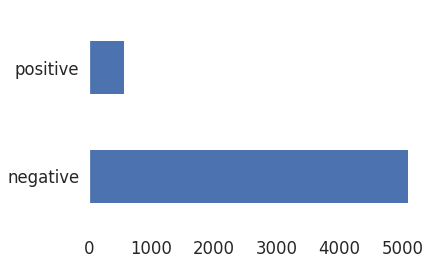

In [25]:
pandas_Covid_einstein['SARS-Cov-2 exam result'].value_counts().plot.barh()

In [26]:
## Regrouper les variables par rapport à la target 

percent_target = pandas_Covid_einstein.groupby('SARS-Cov-2 exam result').count()
percent_target['percent'] = 100*(percent_target['Leukocytes']/pandas_Covid_einstein['SARS-Cov-2 exam result'].count())
percent_target.reset_index(level=0, inplace=True)
percent_target

,SARS-Cov-2 exam result,Patient ID,Patient age quantile,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis),percent
0,negative,5086,5086,5086,5086,5086,520,520,519,518,519,519,519,519,519,519,519,519,518,519,175,1242,1242,1242,1240,1240,1240,0,1240,1240,1240,1240,1240,1240,1240,1240,1240,1240,1240,438,338,436,362,313,312,758,758,185,186,123,142,142,142,115,44,318,35,116,116,116,116,1,116,116,116,88,88,88,88,88,88,49,58,58,58,58,48,1,58,57,50,0,58,58,58,56,57,58,58,0,76,110,75,0,3,81,21,14,5,0,13,14,14,14,14,14,14,14,11,19,14,9.195606
1,positive,558,558,558,558,558,83,83,83,81,83,83,83,83,83,83,83,83,83,83,33,112,112,112,112,112,112,0,112,112,112,112,112,112,112,112,112,112,112,75,59,70,62,58,58,62,62,40,40,30,40,40,40,29,6,14,5,20,20,20,20,0,20,20,20,9,9,9,9,9,9,11,12,12,12,12,9,0,12,12,10,0,12,12,12,11,12,12,12,0,15,23,26,0,0,23,2,13,3,0,0,13,13,13,13,13,13,13,9,1,13,1.470588


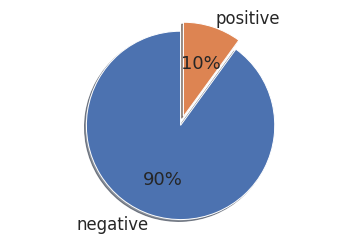

In [27]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'negative','positive'
sizes = [9, 1]
explode = (0.1, 0)  # only "explode" the 1st slice (i.e. 'Toxic contents')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.0f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Nous avons 90% de test negatives et 10 % de positives dans notre échantillon

### Features engineering

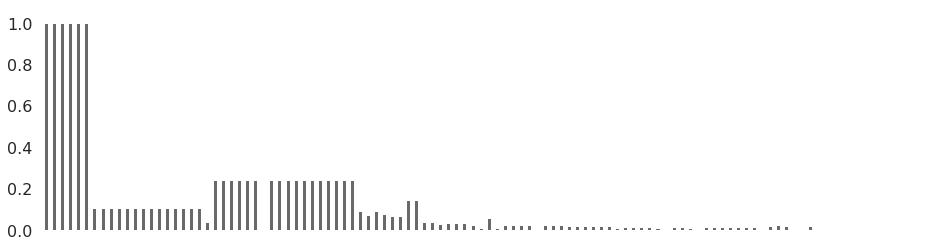

In [30]:
# les valeurs manquantes 
msno.bar(pandas_Covid_einstein, figsize=(16, 4))

In [31]:
(pandas_Covid_einstein.isnull().sum() == pandas_Covid_einstein.shape[0]).any()

Out[35]: True

In [32]:
full_null_data = (pandas_Covid_einstein.isnull().sum() == pandas_Covid_einstein.shape[0])
full_null_columns = full_null_data[full_null_data == True].index

In [33]:
## colonnes avec toutes les valeurs égales à 0  

print(full_null_columns.tolist())

['Mycoplasma pneumoniae', 'Urine - Sugar', 'Partial thromboplastin time\xa0(PTT)\xa0', 'Prothrombin time (PT), Activity', 'D-Dimer']

In [34]:
pandas_Covid_einstein.drop(full_null_columns, axis=1, inplace=True)

In [35]:
(pandas_Covid_einstein.isnull().sum() / pandas_Covid_einstein.shape[0]).sort_values(ascending=False).head()

Out[39]: Fio2 (venous blood gas analysis) 0.999823
Urine - Nitrite 0.999823
Vitamin B12 0.999468
Lipase dosage 0.998583
Albumin 0.997697
dtype: float64

In [36]:
contain_null_series = (pandas_Covid_einstein.isnull().sum() != 0).index

In [37]:
target = 'SARS-Cov-2 exam result'
just_one_target = []

for col in contain_null_series:
    i = pandas_Covid_einstein[pandas_Covid_einstein[col].notnull()][target].nunique()
    if i == 1:
        just_one_target.append(col)    

# Selection de colonne contenant uniquement covid négative        
print(just_one_target)

['Fio2 (venous blood gas analysis)', 'Urine - Nitrite', 'Vitamin B12', 'Albumin']

In [38]:
for col in just_one_target:
    print(pandas_Covid_einstein[pandas_Covid_einstein[col].notnull()][target].unique())

['negative']
['negative']
['negative']
['negative']

In [39]:
pandas_Covid_einstein.drop(just_one_target, axis=1, inplace=True)

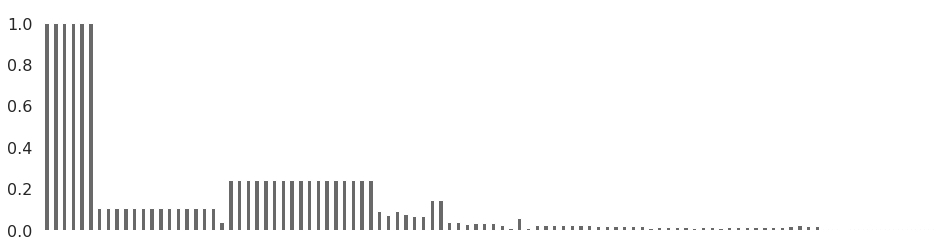

In [40]:
msno.bar(pandas_Covid_einstein, figsize=(16, 4))

In [41]:
not_null_series = (pandas_Covid_einstein.isnull().sum() == 0)
not_null_columns = not_null_series[not_null_series == True].index
not_null_columns = not_null_columns[1:]

### Visualisation des données

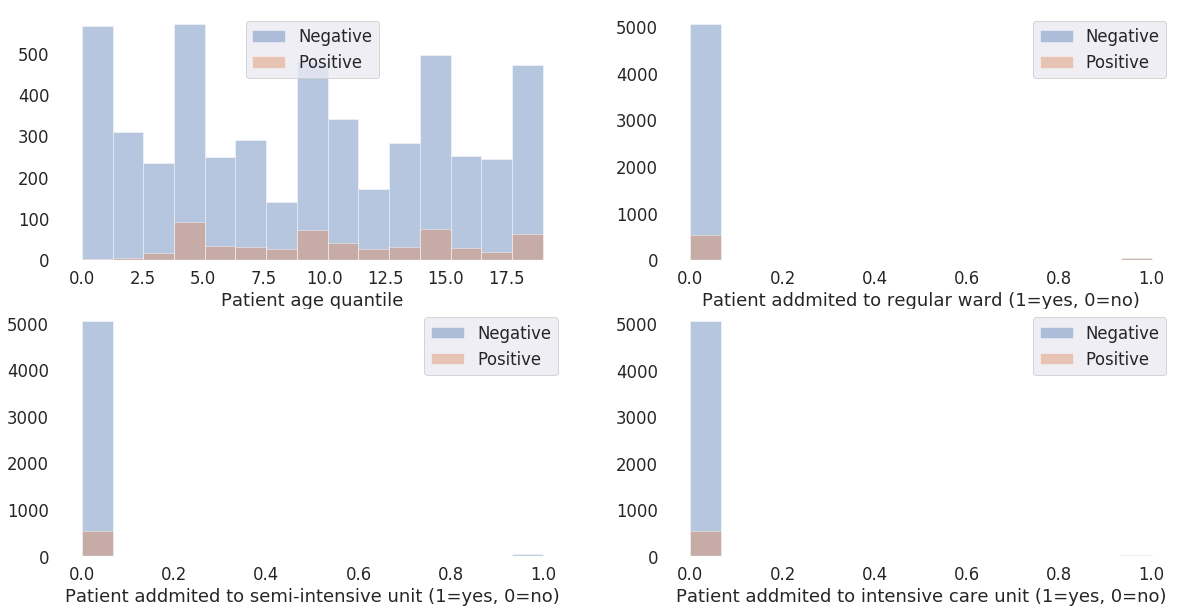

In [43]:
def plot_histograms(pandas_Covid_einstein, cols, subplots_rows, subplots_cols, figsize=(20, 10), target='SARS-Cov-2 exam result'):
    df_neg = pandas_Covid_einstein[pandas_Covid_einstein[target] == 'negative']
    df_pos = pandas_Covid_einstein[pandas_Covid_einstein[target] == 'positive']
    
    cols = cols.tolist()
    cols.remove(target)
    
    plt.figure()
    fig, ax = plt.subplots(subplots_rows, subplots_cols, figsize=figsize)
    
    i = 0    
    for col in cols:
        i += 1
        plt.subplot(subplots_rows, subplots_cols, i)
        sns.distplot(df_neg[col], label="Negative", bins=15, kde=False)
        sns.distplot(df_pos[col], label="Positive", bins=15, kde=False)
        plt.legend()
    plt.show()
    
plot_histograms(pandas_Covid_einstein, not_null_columns, 2, 2)

In [44]:
# variables  categorical
mask_pos_neg = {'positive': 1, 'negative': 0}
mask_detected = {'detected': 1, 'not_detected': 0}
mask_notdone_absent_present = {'not_done': 0, 'absent': 1, 'present': 2}
mask_normal = {'normal': 1}
mask_urine_color = {'light_yellow': 1, 'yellow': 2, 'citrus_yellow': 3, 'orange': 4}
mask_urine_aspect = {'clear': 1, 'lightly_cloudy': 2, 'cloudy': 3, 'altered_coloring': 4}
mask_realizado = {'Não Realizado': 0}
mask_urine_leuk = {'<1000': 1000}
mask_urine_crys = {'Ausentes': 1, 'Urato Amorfo --+': 0, 'Oxalato de Cálcio +++': 0,
                   'Oxalato de Cálcio -++': 0, 'Urato Amorfo +++': 0}

In [45]:
pandas_Covid_einstein = pandas_Covid_einstein.replace(mask_detected)
pandas_Covid_einstein = pandas_Covid_einstein.replace(mask_pos_neg)
pandas_Covid_einstein = pandas_Covid_einstein.replace(mask_notdone_absent_present)
pandas_Covid_einstein = pandas_Covid_einstein.replace(mask_normal)
pandas_Covid_einstein = pandas_Covid_einstein.replace(mask_realizado)
pandas_Covid_einstein = pandas_Covid_einstein.replace(mask_urine_leuk)
pandas_Covid_einstein = pandas_Covid_einstein.replace(mask_urine_color)
pandas_Covid_einstein = pandas_Covid_einstein.replace(mask_urine_aspect)
pandas_Covid_einstein = pandas_Covid_einstein.replace(mask_urine_crys)

pandas_Covid_einstein['Urine - pH'] = pandas_Covid_einstein['Urine - pH'].astype('float')
pandas_Covid_einstein['Urine - Leukocytes'] = pandas_Covid_einstein['Urine - Leukocytes'].astype('float')

In [46]:
corr=pandas_Covid_einstein.corr(method='pearson')
corr

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
Patient age quantile,1.000000,0.075244,0.046166,0.015736,-0.035772,0.096808,0.060320,-0.158683,0.119449,-0.037510,-0.125935,-0.124671,-0.166386,0.107525,0.197394,0.022085,0.281655,0.050962,0.166429,0.215857,-0.234053,-0.002492,-0.112122,0.027315,0.027551,-0.105026,0.044473,0.046219,0.010063,-0.130514,-0.091523,0.008569,-0.001781,-0.072055,-0.032501,-0.040768,NaN,0.086923,0.338425,0.088205,0.372614,0.001904,-0.004909,-0.085244,-0.117207,0.128795,0.038809,0.224382,0.145813,0.268306,0.008057,-0.480906,-0.309841,-0.007799,-0.127646,0.208016,-0.059379,0.555328,-0.071306,0.503174,0.256466,0.510971,0.046603,0.284189,1.300393e-01,1.791793e-01,8.934714e-02,NaN,-0.121138,-0.146562,-0.205719,0.080136,-0.107991,-0.101288,-0.118386,-0.107543,-0.132006,-0.136645,0.217843,1.596755e-01,NaN,NaN,NaN,-0.003150,-0.122878,0.014032,-0.149753,-0.100993,0.395562,0.097130,-0.357362,-0.223949,-0.469049,5.704452e-01,0.570755,0.086133,0.166245,-0.098422,-0.334562,-0.511705,-0.061265
SARS-Cov-2 exam result,0.075244,1.000000,0.142437,0.019364,0.027586,0.099120,0.104775,-0.282268,0.108836,0.121320,-0.015239,0.045820,-0.288508,-0.062994,-0.028480,-0.192609,-0.055232,0.197333,-0.039855,-0.018834,-0.060013,-0.034856,-0.039007,-0.014173,-0.010888,-0.151724,-0.036827,-0.025943,-0.024603,-0.029613,-0.035881,0.008396,-0.023187,-0.084016,-0.011568,-0.030742,NaN,-0.037977,-0.069234,0.071972,0.081675,-0.087606,-0.092970,-0.033178,-0.074419,0.113576,0.151410,0.132165,-0.125322,-0.071352,-0.141361,-0.063171,-0.305113,-0.070873,-0.087447,-0.007798,0.005321,0.102881,0.002612,0.054695,0.088392,0.061371,0.126906,0.186514,-3.263956e-02,-1.010460e-01,-7.455401e-02,NaN,0.061684,-0.103821,-0.046910,-0.134222,0.054759,0.057864,-0.180874,0.055641,0.058222,-0.080381,0.126155,-6.452173e-02,NaN,NaN,NaN,-0.100163,0.045995,-0.039899,0.109557

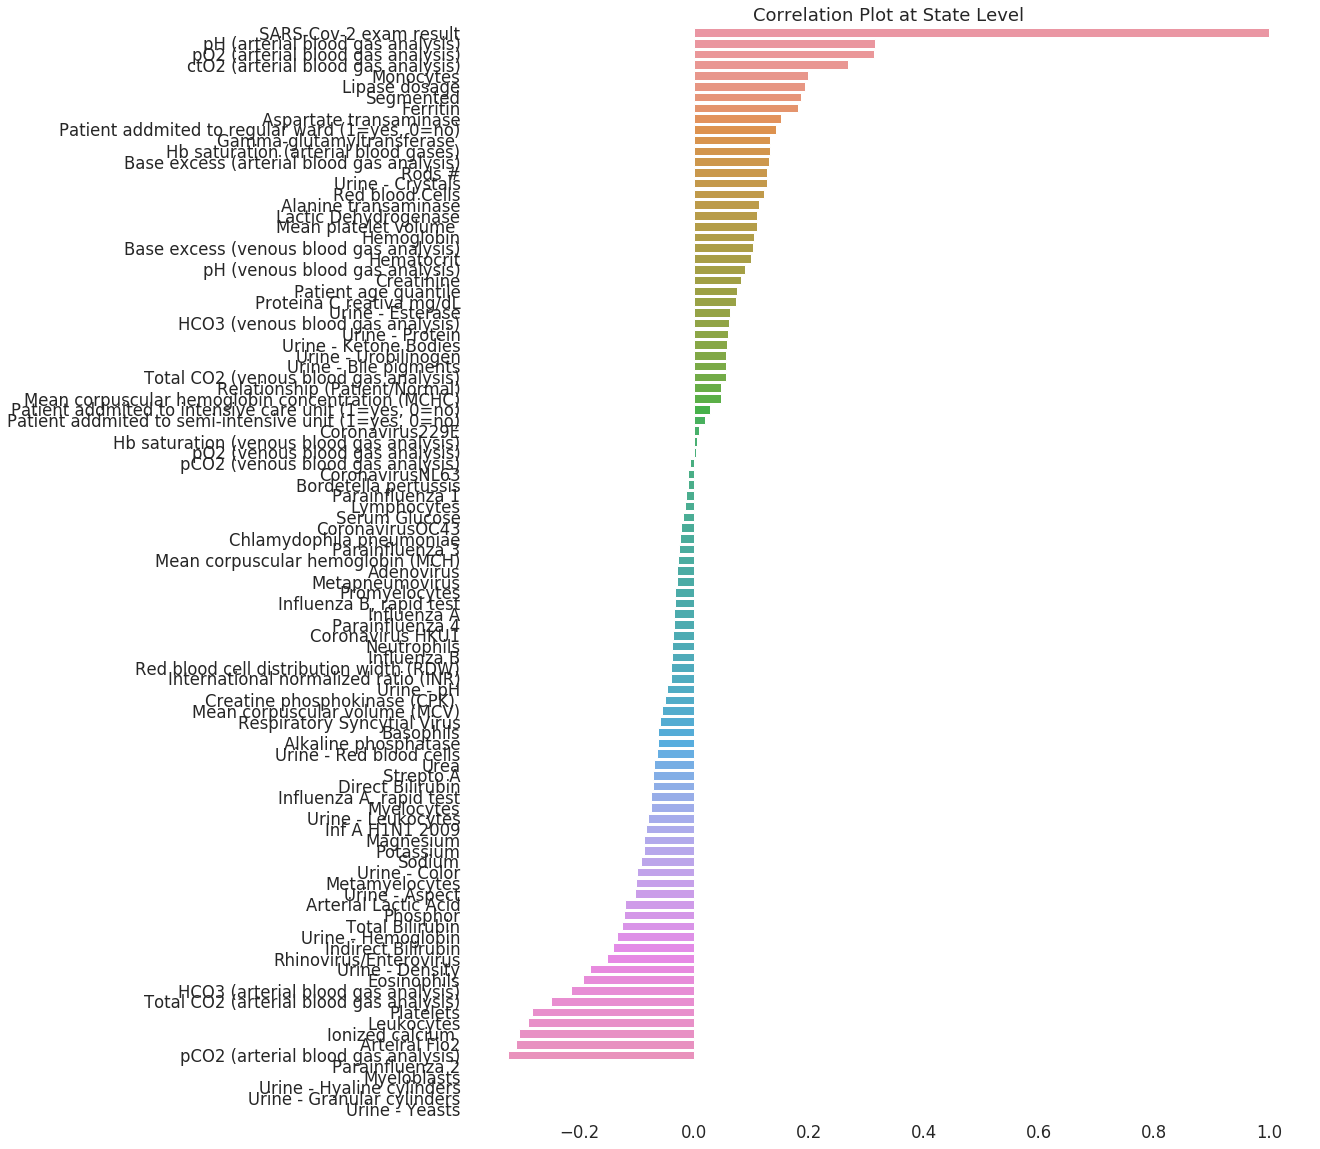

In [47]:

corr=pandas_Covid_einstein.corr(method='pearson')
corr=corr.sort_values(by=["SARS-Cov-2 exam result"],ascending=False).iloc[0].sort_values(ascending=False)
plt.figure(figsize=(15,20))
sns.barplot(x=corr.values, y=corr.index.values);
plt.title("Correlation Plot at State Level")
display()

In [48]:
display(pandas_Covid_einstein)

Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
44477f75e8169d2,13,0,0,0,0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
126e9dd13932f68,17,0,0,0,0,0.236515447,-0.022340268,-0.51741302,0.01067657,0.102004185,0.318365753,-0.950790346,-0.094610348,-0.223766506,-0.292269319,1.482158184,0.166192397,0.357546657,-0.625072658,-0.140648082,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.619086027,1.198059082,-0.147894949,2.089928389,-0.305787146,0.862511635,0.0,0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
a46b4402a0e5696,8,0,0,0,0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
f7d619a94f97c45,5,0,0,0,0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,nu

### III.	PREPARATION DES DONNEES

In [50]:
x = pandas_Covid_einstein.drop(['Patient ID', 'SARS-Cov-2 exam result'], axis=1)
x.fillna(999999, inplace=True)
y = pandas_Covid_einstein['SARS-Cov-2 exam result']

In [51]:
dt = DecisionTreeClassifier(max_depth=3)

In [52]:
dt.fit(x, y)

Out[54]: DecisionTreeClassifier(max_depth=3)

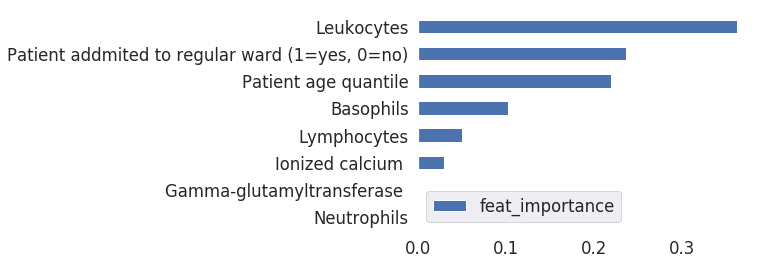

In [53]:
dt_feat = pd.DataFrame(dt.feature_importances_, index=x.columns, columns=['feat_importance'])
dt_feat.sort_values('feat_importance').tail(8).plot.barh()
plt.show()


Feature importance est très important dans le domaine de  la modélisation machine learning. Il permet de comprendre quelles sont les variables qui contribuent le plus dans le modèle et aussi de pouvoir interpreter les résultats. 

Cette partie est cruciale car elle va permettre aux data scientist de pouvoir expliquer aisément les résultats. 
Les variables apparaissant dans les features importance : 
 

- Leukocytes 

- Patient addmited to regular ward (1 =yes, 0=no)

- Patient age quantile 

- Basophils

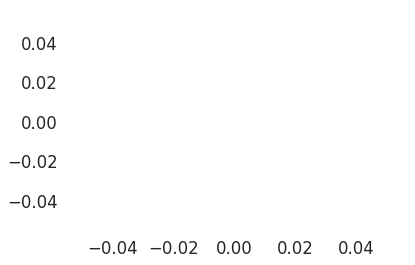

In [55]:
sns.distplot(pandas_Covid_einstein[pandas_Covid_einstein['SARS-Cov-2 exam result'] == 1]['Leukocytes'], label="Covid")
sns.distplot(pandas_Covid_einstein[pandas_Covid_einstein['SARS-Cov-2 exam result'] == 0]['Leukocytes'], label="No Covid")
plt.legend()

###  IV.	MODELISATION

#### Description du process de modélisation


Nou testerons dans cette section plusieurs modèles de classification tels les SVM, les methodes ensembles (RF, adaboost,...), Reseaux de neurones etc... dans l'objectif de choisir le meilleur modèle. Puis nous optimiserons les hyperparametres des modèles qui nous semblent les plus performants. Enfin nous generons les courbes d'apprentissage afn d'évaluer le niveau d'apprentissage de ces modèles pour verifer l'overfitting où  l'underfitting.

In [58]:
classifiers = {'Logistic Regression' : LogisticRegression(),
               'KNN': KNeighborsClassifier(),
               'Decision Tree': DecisionTreeClassifier(),
               'Random Forest': RandomForestClassifier(),
               'AdaBoost': AdaBoostClassifier(),
               'SVM': SVC()}

samplers = {'Random_under_sampler': RandomUnderSampler(),
            'Random_over_sampler': RandomOverSampler()}

drop_cols = ['Patient ID', 'Patient addmited to regular ward (1=yes, 0=no)',
             'Patient addmited to semi-intensive unit (1=yes, 0=no)',
             'Patient addmited to intensive care unit (1=yes, 0=no)']

In [59]:
def df_split(pandas_Covid_einstein, target='SARS-Cov-2 exam result', drop_cols=drop_cols):
    pandas_Covid_einstein = pandas_Covid_einstein.drop(drop_cols, axis=1)
    pandas_Covid_einstein = pandas_Covid_einstein.fillna(999)
    x = pandas_Covid_einstein.drop(target, axis=1)
    y = pandas_Covid_einstein[target]    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)                          
    return x_train, x_test, y_train, y_test

def train_clfs(pandas_Covid_einstein, classifiers, samplers):
    
    x_train, x_test, y_train, y_test = df_split(pandas_Covid_einstein)
    
    names_samplers = []
    names_clfs = []
    results_train_cv_roc_auc = []
    results_train_cv_recall = []
    results_train_cv_accuracy = []
    results_test_roc_auc = []
    results_test_recall = []
    results_test_accuracy = []
    
    for name_sampler, sampler in samplers.items():
        print(f'Sampler: {name_sampler}\n')
        for name_clf, clf in classifiers.items():
            print(f'Classifier: {name_clf}\n')
            
            pipeline = Pipeline([('sampler', sampler),
                                 ('clf', clf)])
            
            cv_auc = cross_val_score(pipeline, x_train, y_train, cv=10, scoring='roc_auc') 
            cv_rec = cross_val_score(pipeline, x_train, y_train, cv=10, scoring='recall')                                
            cv_acc = cross_val_score(pipeline, x_train, y_train, cv=10, scoring='accuracy')        

            pipeline.fit(x_train, y_train)        
            y_pred = pipeline.predict(x_test)
            
            names_samplers.append(name_sampler)
            names_clfs.append(name_clf)
            results_train_cv_roc_auc.append(cv_auc)
            results_train_cv_recall.append(cv_rec)
            results_train_cv_accuracy.append(cv_acc)
            results_test_roc_auc.append(roc_auc_score(y_test, y_pred))
            results_test_recall.append(recall_score(y_test, y_pred))
            results_test_accuracy.append(accuracy_score(y_test, y_pred))

            print(f'CV\t-\troc_auc:\t{round(cv_auc.mean(), 3)}')
            print(f'CV\t-\trecall:\t\t{round(cv_rec.mean(), 3)}')
            print(f'CV\t-\taccuracy:\t{round(cv_acc.mean(), 3)}')

            print(f'Test\t-\troc_auc:\t{round(roc_auc_score(y_test, y_pred), 3)}')         
            print(f'Test\t-\trecall:\t\t{round(recall_score(y_test, y_pred), 3)}')          
            print(f'Test\t-\taccuracy:\t{round(accuracy_score(y_test, y_pred), 3)}')      
            print('\n<-------------------------->\n')

    df_results_test = pd.DataFrame(index=[names_clfs, names_samplers], columns=['ROC_AUC', 'RECALL', 'ACCURACY'])
    df_results_test['ROC_AUC'] = results_test_roc_auc
    df_results_test['RECALL'] = results_test_recall
    df_results_test['ACCURACY'] = results_test_accuracy

    return df_results_test

In [60]:
df_results_test = train_clfs(pandas_Covid_einstein, classifiers, samplers)

Sampler: Random_under_sampler

Classifier: Logistic Regression

CV	-	roc_auc:	0.567
CV	-	recall: 0.776
CV	-	accuracy:	0.365
Test	-	roc_auc:	0.543
Test	-	recall: 0.768
Test	-	accuracy:	0.362

<-------------------------->

Classifier: KNN

CV	-	roc_auc:	0.498
CV	-	recall: 0.144
CV	-	accuracy:	0.806
Test	-	roc_auc:	0.537
Test	-	recall: 0.196
Test	-	accuracy:	0.81

<-------------------------->

Classifier: Decision Tree

CV	-	roc_auc:	0.594
CV	-	recall: 0.67
CV	-	accuracy:	0.522
Test	-	roc_auc:	0.608
Test	-	recall: 0.795
Test	-	accuracy:	0.459

<-------------------------->

Classifier: Random Forest

CV	-	roc_auc:	0.631
CV	-	recall: 0.699
CV	-	accuracy:	0.519
Test	-	roc_auc:	0.594
Test	-	recall: 0.75
Test	-	accuracy:	0.469

<-------------------------->

Classifier: AdaBoost

CV	-	roc_auc:	0.629
CV	-	recall: 0.762
CV	-	accuracy:	0.431
Test	-	roc_auc:	0.603
Test	-	recall: 0.893
Test	-	accuracy:	0.37

<-------------------------->

Classifier: SVM

CV	-	roc_auc:	0.557
CV	-	recall: 0.852
CV	-	accuracy:	0.336
Test	-	roc_auc:	0.549
Test	-	recall: 0.821
Test	-	accuracy:	0.331

<-------------------------->

Sampler: Random_over_sampler

Classifier: Logistic Regression

CV	-	roc_auc:	0.576
CV	-	recall: 0.762
CV	-	accuracy:	0.381
Test	-	roc_auc:	0.547
Test	-	recall: 0.777
Test	-	accuracy:	0.362

<-------------------------->

Classifier: KNN

CV	-	roc_auc:	0.549
CV	-	recall: 0.076
CV	-	accuracy:	0.869
Test	-	roc_auc:	0.524
Test	-	recall: 0.08
Test	-	accuracy:	0.88

<-------------------------->

Classifier: Decision Tree

CV	-	roc_auc:	0.599
CV	-	recall: 0.612
CV	-	accuracy:	0.521
Test	-	roc_auc:	0.624
Test	-	recall: 0.768
Test	-	accuracy:	0.508

<-------------------------->

Classifier: Random Forest

CV	-	roc_auc:	0.602
CV	-	recall: 0.588
CV	-	accuracy:	0.526
Test	-	roc_auc:	0.602
Test	-	recall: 0.759
Test	-	accuracy:	0.477

<-------------------------->

Classifier: AdaBoost

CV	-	roc_auc:	0.63
CV	-	recall: 0.729
CV	-	accuracy:	0.514
Test	-	roc_auc:	0.585
Test	-	recall: 0.768
Test	-	accuracy:	0.438

<-------------------------->

Classifier: SVM

CV	-	roc_auc:	0.564
CV	-	recall: 0.755
CV	-	accuracy:	0.399
Test	-	roc_auc:	0.535
Test	-	recall: 0.152
Test	-	accuracy:	0.842

<-------------------------->

#### Hyperparameters tuning

In [62]:
def train_xgb(pandas_Covid_einstein, clf):
    
    x_train, x_test, y_train, y_test = df_split(pandas_Covid_einstein)

    scale_pos_weight = len(pandas_Covid_einstein[pandas_Covid_einstein['SARS-Cov-2 exam result'] == 0]) / len(pandas_Covid_einstein[pandas_Covid_einstein['SARS-Cov-2 exam result'] == 1])

    param_grid = {'xgb__max_depth': [3, 4, 5, 6, 7, 8],
                  'xgb__learning_rate': [0.01, 0.05, 0.1, 0.2],
                  'xgb__colsample_bytree': [0.6, 0.7, 0.8],
                  'xgb__min_child_weight': [0.4, 0.5, 0.6],
                  'xgb__gamma': [0, 0.01, 0.1],
                  'xgb__reg_lambda': [6, 7, 8, 9, 10],
                  'xgb__n_estimators': [150, 200, 300],
                  'xgb__scale_pos_weight': [scale_pos_weight]}

    rs_clf = RandomizedSearchCV(clf, param_grid, n_iter=100,
                                n_jobs=-1, verbose=2, cv=5,                            
                                scoring='roc_auc', random_state=42)

    rs_clf.fit(x_train, y_train)
    
    print(f'XGBOOST BEST PARAMS: {rs_clf.best_params_}')
    
    y_pred = rs_clf.predict(x_test)

    df_results_xgb = pd.DataFrame(index=[['XGBoost'], ['No_sampler']], columns=['ROC_AUC', 'RECALL', 'ACCURACY'])

    df_results_xgb['ROC_AUC'] = roc_auc_score(y_test, y_pred)
    df_results_xgb['RECALL'] = recall_score(y_test, y_pred)
    df_results_xgb['ACCURACY'] = accuracy_score(y_test, y_pred)
    
    return df_results_xgb

In [63]:
df_results_xgb = train_xgb(pandas_Covid_einstein, xgb.XGBClassifier())

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 37 tasks | elapsed: 46.8s
[Parallel(n_jobs=-1)]: Done 158 tasks | elapsed: 3.2min
[Parallel(n_jobs=-1)]: Done 361 tasks | elapsed: 7.3min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 10.1min finished
[15:15:54] WARNING: ../src/learner.cc:516: 
Parameters: { xgb__colsample_bytree, xgb__gamma, xgb__learning_rate, xgb__max_depth, xgb__min_child_weight, xgb__n_estimators, xgb__reg_lambda, xgb__scale_pos_weight } might not be used.

 This may not be accurate due to some parameters are only used in language bindings but
 passed down to XGBoost core. Or some parameters are not used but slip through this
 verification. Please open an issue if you find above cases.


XGBOOST BEST PARAMS: {'xgb__scale_pos_weight': 9.114695340501791, 'xgb__reg_lambda': 7, 'xgb__n_estimators': 300, 'xgb__min_child_weight': 0.5, 'xgb__max_depth': 8, 'xgb__learning_rate': 0.01, 'xgb__gamma': 0, 'xgb__colsample_bytree': 0.6}

In [64]:
df_results = pd.concat([df_results_test, df_results_xgb])

### Evaluation des modèles

In [66]:
df_plot = pd.concat([df_results.sort_values('ROC_AUC', ascending=False).head(3),
                     df_results.sort_values('RECALL', ascending=False).head(3),
                     df_results.sort_values('ACCURACY', ascending=False).head(3)])

In [67]:
def plot_test(pandas_Covid_einstein, xlim_min, xlim_max):

    f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10,12))
    color = ['blue', 'red', 'green', 'yellow', 'orange', 'purple', 'navy', 'turquoise', 'darkorange']

    pandas_Covid_einstein['ROC_AUC'].plot(kind='barh', ax=ax1, xlim=(xlim_min, xlim_max), title='ROC_AUC', color=color)
    pandas_Covid_einstein['RECALL'].plot(kind='barh', ax=ax2, xlim=(xlim_min, xlim_max), title='RECALL', color=color)
    pandas_Covid_einstein['ACCURACY'].plot(kind='barh', ax=ax3, xlim=(xlim_min, xlim_max), title='ACCURACY', color=color)
    plt.show()

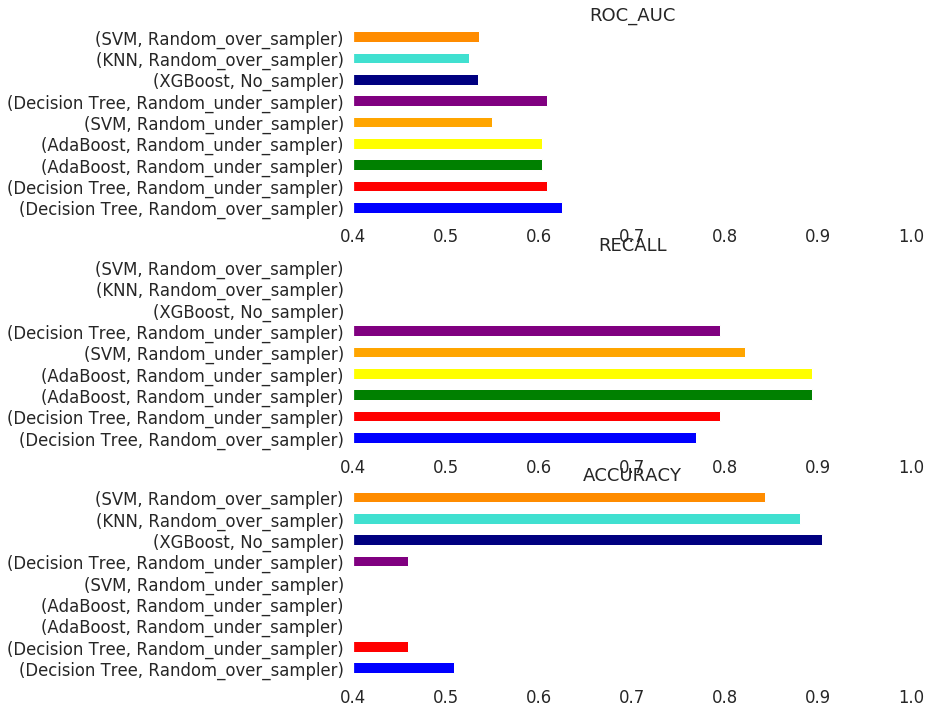

In [68]:
plot_test(df_plot, 0.4, 1)

*On peut constater que : 

- Pour le métrique : ROC-AUC 


     Le  modèle (Random Forest, Random_under_sampler) présentes de beaux scores d'accuracy pour la courbe d'apprentissage comme pour la courbe de validation. 
    Mais nous risquerons d'être  en presence d'un cas d'over-fitting. 
    
- Pour Recall (Rappel)
    
    (SVM, Random_over_sampler) a  une  valeur maximale de rappel et tend vers 1. 


- Pour l'accuracy 
    
  (XGBoost, No_sampler) a les meilleurs scores  


Nos meilleurs modèles sont les suivants:

    - Random Forest, Random_under_sampler
    
    - SVM, Random_over_sampler
    
    
    - XGBoost, No_sampler

### Analyse de matrices de confusions à différents seuils de confiance

In [71]:
def plot_confusion_matrix(y_test, y_pred, title='Confusion matrix'):
    
    cm = confusion_matrix(y_test, y_pred)
    classes = ['No Covid', 'Covid']

    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues, )
    plt.title(title, fontsize=14)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
def train_clf_threshold(pandas_Covid_einstein, clf, sampler=None):
    thresholds = np.arange(0.1, 1, 0.1)
    
    x_train, x_test, y_train, y_test = df_split(pandas_Covid_einstein)
    
    if sampler:
        clf_train = Pipeline([('sampler', sampler),
                              ('clf', clf)])
        
    else:        
        clf_train = clf
            
    clf_train.fit(x_train, y_train)
    y_proba = clf_train.predict_proba(x_test)
    
    plt.figure(figsize=(20,20))

    j = 1
    for i in thresholds:
        y_pred = y_proba[:,1] > i

        plt.subplot(4, 3, j)
        j += 1

        # Compute confusion matrix
        cnf_matrix = confusion_matrix(y_test,y_pred)
        np.set_printoptions(precision=2)

        print(f"Threshold: {round(i, 1)} | Test Accuracy: {round(accuracy_score(y_test, y_pred), 2)}| Test Recall: {round(recall_score(y_test, y_pred), 2)} | Test Roc Auc: {round(roc_auc_score(y_test, y_pred), 2)}")

        # Plot non-normalized confusion matrix
        plot_confusion_matrix(y_test, y_pred, title=f'Threshold >= {round(i, 1)}')

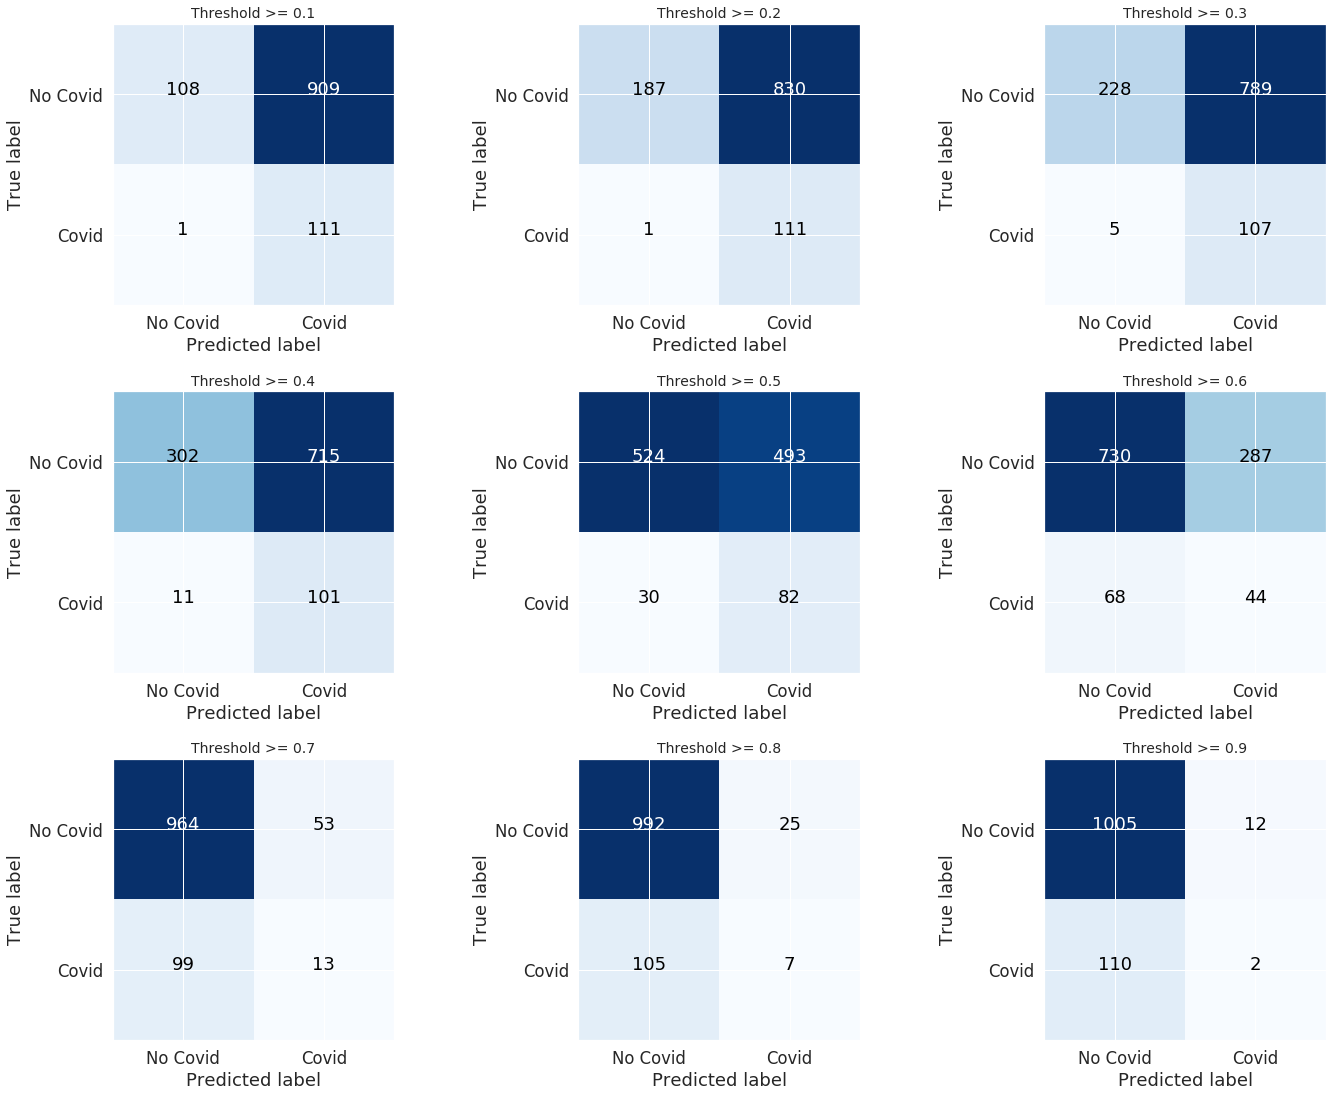

In [72]:
train_clf_threshold(pandas_Covid_einstein, RandomForestClassifier(), sampler=RandomUnderSampler())

In [73]:
## Seuil de confiance : 90%


TN = 1005
FP = 12
FN = 110
TP = 2

##  la sensibilité est le ratio du nombre de vrai positifs par le nombre total d'éléments positifs (y compris ceux déclarés faux par erreur).
## La spécificité c'est le ratio du nombre de vrai négatifs par le nombre total d'élément négatifs (y compris ceux déclarés vrai par erreur).

##

sensitivity = TP / float(FN + TP)

print("Sensibilité : %.2f" %  sensitivity)

specificity = TN / (TN + FP)

print("Spécificité  : %.2f" %  specificity)

precision = TP / float(TP + FP)

print("Précision  : %.2f" % precision)

Sensibilité : 0.02
Spécificité : 0.99
Précision : 0.14

### Analyse de résultats

- A partir de la matrice de confusion, de métriques d'évaluation ont été extraites pour permettre l'analyse du modèle. 
 
 - Le rappel ("recall"  en anglais), ou sensibilité ("sensitivity" en anglais), est le taux de vrais positifs, c’est à dire la proportion de positifs que l’on a correctement identifiés. C’est la capacité de notre modèle à détecter tous les patients décédés. 2% 
 
 - la précision, c’est-à-dire la proportion de prédictions correctes parmi les points que l’on a prédits positifs. C’est la capacité de notre modèle à ne déclencher le traitement que pour un vrai malade potentiellement risqué c'est à dire pouvant décéder. 14% 
 
 - La spécificité ("specificity" en anglais), qui est le taux de vrais négatifs, autrement dit la capacité à détecter toutes les  situations où il n’y a pas de décès. C’est une mesure complémentaire de la sensibilité. 99%

### V.	CONCLUSION

####  Les résultats sont assez mitigé après ce premier entrainement. On peut noter les résultats :
- la classification  RandomForestClassifier de résultats encourangeants en terme de sensibilité, précision, et specificité. 


- le modèle AdaBoost pourrait être une alternative. 


#### Prochaines étapes pour améliorer le modèle:


- Ajouter de nouvelles variables sur la base de nouvelles ingestions de bases de données plus historiques sur les patients. 

- Création, transformation et génération des nouvelles variables plus discriminantes.

- Tunner les hyperparamètres pour diminuer l'overfitting. 

- Ajouter d'autres critères d'évaluation des performances des algorithmes. 

- Itérer plusieurs modèles en fonction des produits